In [211]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from lmfit.models import SineModel, ExponentialModel
# from lmfit import Model

from scipy.optimize import curve_fit

In [212]:
data = pd.read_csv('../singlephotoncsv/qwp.csv')

In [213]:
data = data.rename(columns={'angle xi':'angles'}) 
data = data.sort_values(by ='angles').reset_index()
data['yerrs'] = np.array([data['coincidences']*0.02, np.sqrt(data['coincidences'])]).T.max(axis=1)
data['radians'] = np.deg2rad(data['angles'])

In [214]:
data  = data[:17]

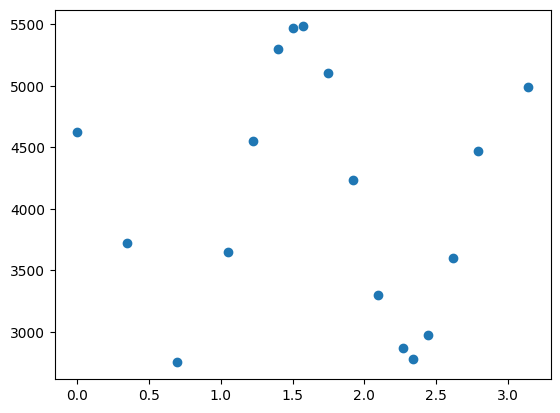

In [215]:
plt.scatter(data['radians'] , data['coincidences'])

In [216]:
def cos_squared(x, A, B, C, D):
    return A * np.cos(B * x + C) + D

In [217]:
# Initial guesses for A, B, C, D
initial_guess = [data['coincidences'].max() - data['coincidences'].min(), 1, -np.pi/2, data['coincidences'].min()]

params, params_covariance = curve_fit(cos_squared, data['radians'], data['coincidences'])
params_uncertainties = np.sqrt(np.diag(params_covariance))

In [218]:
print(params_uncertainties)
print(np.rad2deg(params_uncertainties))

[71.34717122  0.08231023  0.151059   55.74876078]
[4087.89179105    4.71602899    8.65504294 3194.16870586]


In [219]:
xlin_rad = np.linspace(0,3, 50000)
xlin = np.rad2deg(xlin_rad)

In [220]:
# anfle of the maximum
ys = cos_squared(xlin_rad, *params)
center = xlin_rad[ys.argmax()]
print(center)
print(np.rad2deg(center))

1.5113102262045242
86.59169749648099


In [221]:
data = pd.read_csv('../singlephotoncsv/qwp.csv')
data = data.rename(columns={'angle xi':'angles'}) 
data = data.sort_values(by ='angles').reset_index()
data['yerrs'] = np.array([data['coincidences']*0.02, np.sqrt(data['coincidences'])]).T.max(axis=1)
data['radians'] = np.deg2rad(data['angles'])

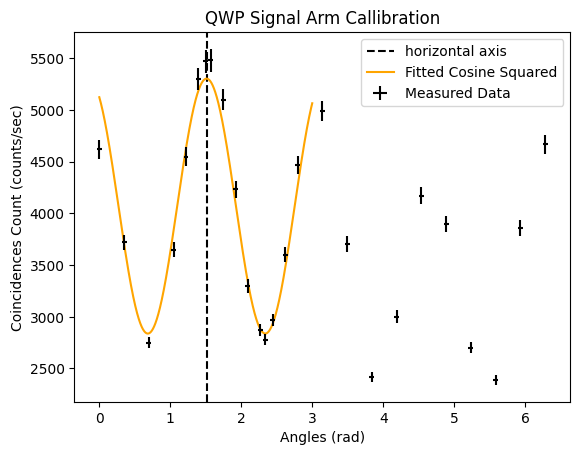

In [223]:
# plt.scatter(data['radians'], data['coincidences'],  s=20, label='data')

plt.axvline(center, label = 'horizontal axis', linestyle ='dashed', color ='black')
plt.plot(xlin_rad, cos_squared(xlin_rad, *params),label='Fitted Cosine Squared', color='orange')
plt.errorbar(data['radians'], y, yerr=data['yerrs'], xerr = ([np.deg2rad(2)]*len(data)), fmt ='none', color ='black', label ='Measured Data')


plt.xlabel('Angles (rad)')
plt.ylabel('Coincidences Count (counts/sec)')
plt.title('QWP Signal Arm Callibration')

plt.legend(loc='best')
plt.show()
